<a href="https://colab.research.google.com/github/Nicko-o/0_PyTorch-Deep-Learning/blob/main/01_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch WorkFlow
Let's explore an example PyTorch end-to-end workflow.

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build a model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evalluating a model (iniference)",
                      5: "saving a loading a model",
                      6: "putting it all toogether"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build a model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evalluating a model (iniference)',
 5: 'saving a loading a model',
 6: 'putting it all toogether'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

Data can be almost anyting... in machine learning.

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

Let's create some example by creating a lineaer regression formula. To make. straight line with *known* **parameters**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (and sometimes validation)

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualising data with math plot lib

In [6]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

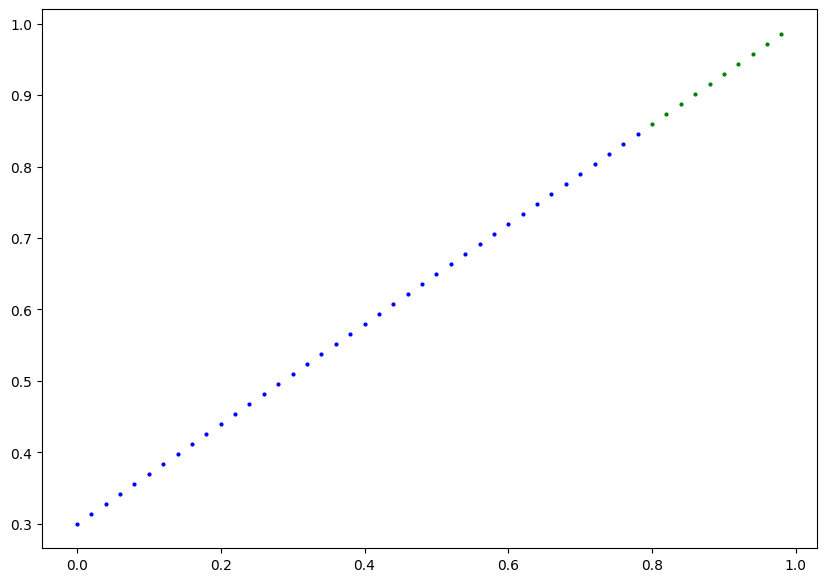

In [7]:
plot_predictions()

## 2. Build model

Our first PyTorch model!


In [23]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from the nn module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, X: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * X + self.bias # This is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs.
* torch.nn.Parameter - what parameters should our model try and learn.
* torch.nn.Module - The base class for all neural network modules.
* torch.optim - this is where the optimizers in PyTorch live, they wil help with gradient descent.
* def forward() - All nn.Module subclasses require you to overwite forward(), this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model

using `.parameters()`

In [21]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check out models predictive power, let's see how well it predicts on `y_test` based on the `X_test`.

When we pass data through our model, it's gonna run through the "forward" method

In [18]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [22]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

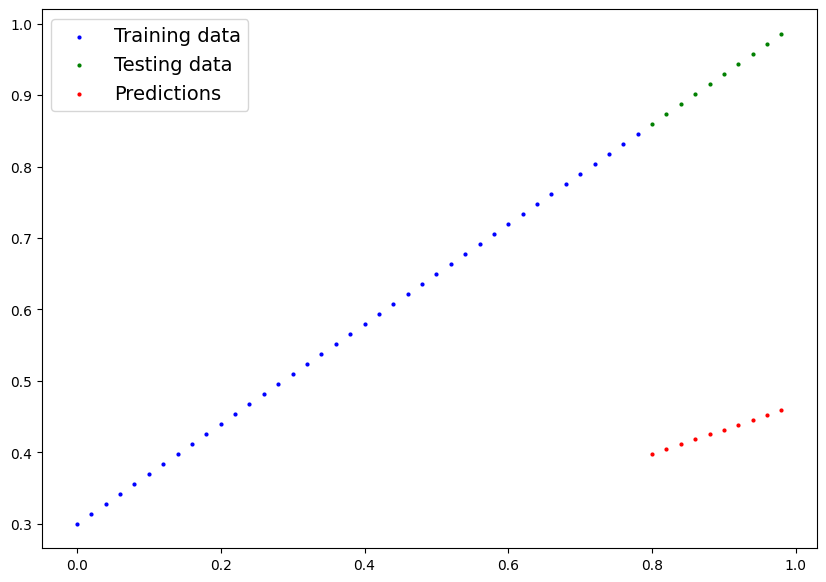

In [24]:
plot_predictions(predictions=y_preds)